In [1]:
# Author:   Kelan Morgan
# Purpose:  Machine Learning Portfolio

# Data:
# - UN WPP (2022); HMD (2023); Zijdeman et al. (2015); Riley (2005) – with minor processing by Our World in Data. “Life expectancy at birth – 
# Various sources – period tables” [dataset]. Human Mortality Database, “Human Mortality Database”; United Nations, 
# “World Population Prospects 2022”; United Nations, “World Population Prospects”; Zijdeman et al., “Life Expectancy at birth 2”; James C. Riley, 
# “Estimates of Regional and Global Life Expectancy, 1800-2001” [original data]. Retrieved October 22, 2024 from https://ourworldindata.org/grapher/life-expectancy

In [70]:
# Imports
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [71]:
# Load CSV
data = pandas.read_csv("Data/life-expectancy.csv", sep = ",", header = 0)

print(data.values)

[['Afghanistan' 'AFG' 1950 27.7275]
 ['Afghanistan' 'AFG' 1951 27.9634]
 ['Afghanistan' 'AFG' 1952 28.4456]
 ...
 ['Zimbabwe' 'ZWE' 2019 61.2925]
 ['Zimbabwe' 'ZWE' 2020 61.1242]
 ['Zimbabwe' 'ZWE' 2021 59.2531]]


In [10]:
# Data Pre-Processing

# remove rows with Uknown in price column from table and price is no larger than 5 million
data = data[data['Price'] != 'Uknown']
data['Price'] = pandas.to_numeric(data['Price'], errors='coerce')
data = data[pandas.to_numeric(data['Price']) <= 5000000]

# remove cars with 1 mile in data and change null to 0
data = data[data['Runned_Miles'] != '1 mile']
data = data.dropna(subset=['Runned_Miles'])
data['Runned_Miles'] = pandas.to_numeric(data['Runned_Miles'], errors='coerce')
data = data[data['Runned_Miles'] < 400000]

print(data['Price'])
print(min(data['Price']))
print(data['Runned_Miles'])

0         21500
1         28750
2         29999
3         34948
4         26555
          ...  
268250     8750
268251     7995
268252    27950
268253    34950
268254    29995
Name: Price, Length: 265790, dtype: int64
100
0         60000
1         44000
2         55000
3         14000
4         61652
          ...  
268250     1800
268251     2009
268252        6
268253     1538
268254      500
Name: Runned_Miles, Length: 265790, dtype: int64


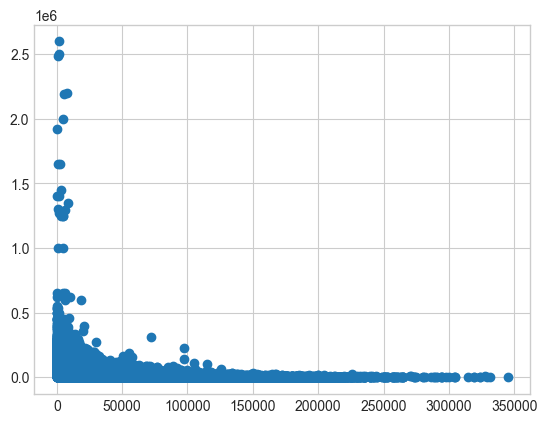

In [11]:
x = data['Runned_Miles'].to_numpy()
y = data['Price']

plt.scatter(x, y)


In [56]:
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

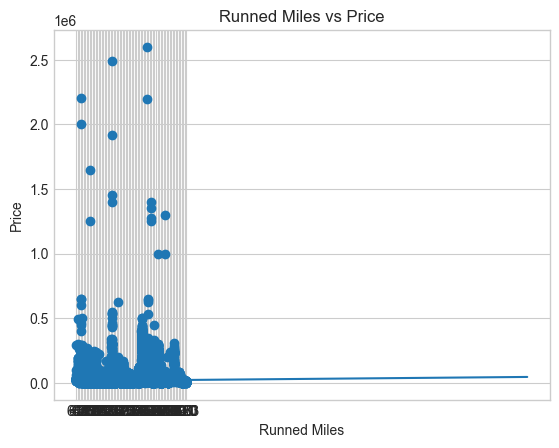

[0.00000000e+00 1.00000033e-04 2.00000067e-04 ... 2.99999800e+02
 2.99999900e+02 3.00000000e+02]
[14412.74234152 14412.75263249 14412.76292346 ... 45285.63043878
 45285.64072976 45285.65102073]


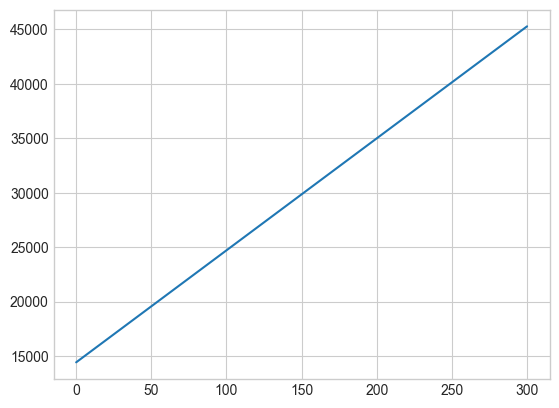

In [118]:
model = LinearRegression(fit_intercept=True)

model.fit(x.to_numpy()[:, np.newaxis], y)

xfit = np.linspace(0, 300, 3000000)
yfit = np.clip(model.predict(xfit[:, np.newaxis]), 0, None)

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlabel('Runned Miles')
plt.ylabel('Price')
plt.title('Runned Miles vs Price')
plt.show()
plt.plot(xfit, yfit)
print(xfit)
print(yfit)